# Chapter 2: Supervised vs Unsupervised
We use matplotlib and seaborn for plotting, numpy to handle the numerical arrays, pandas to create dataframes from the numerical arrays and sklearn to get the data and perform t-SNE

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [2]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

D:\anaconda\envs\d2l\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In this part of code, we have fetched the data using sklearn datasets (only fetch without downloading), and we have an array of pixel values and another array of targets. Since the targets are of string type, we convert them to integers.

pixel_values is a 2-dimensional Dataframe of shape 70000x784. There are 70000 different images, each of size 28x28 pixels.

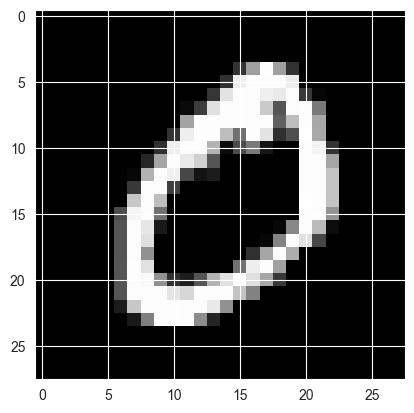

In [7]:
single_image = pixel_values.iloc[1, :].values.reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [9]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values.iloc[:3000, :].values)

This step creates the t-SNE transformation of the data. We use only two components as we can visualize them well in a two-dimensional setting. The transformed_data, in this case, is an array of shape 3000x2. A data like this can be converted to a pandas dataframe.

t-SNE, t-Distribution Neighbor Embedding is a type of dimension reduction tech, which is used to represent high dimension dataset in 2 or 3 dimensional space.

In [13]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)

tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

Here we are creating a pandas dataframe from a numpy array. There are three columns: x, y and targets. x and y are the two components from t-SNE decomposition and targets is the actual number.

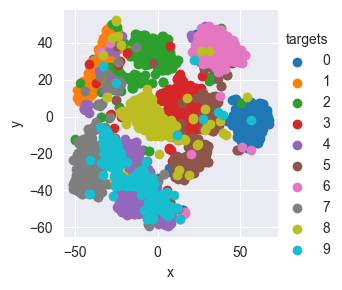

In [15]:
grid = sns.FacetGrid(tsne_df, hue="targets")
grid.map(plt.scatter, "x", "y").add_legend()